# 1. 코로나 데이터 확인

## 코로나 바이러스 데이터

- Case : 코로나 발생 케이스 정리            
case_id / province / city / group / infection_case / confirmed / latitude / longitude            
케이스 번호 / 지역 / 도시 / 집단감염여부 / 감염발생장소 / 확진자수 / 위도 / 경도


- PatientInfo : 코로나 환자 정보             
patient_id / sex / age / country / province / city / infection_case / infected_by / contact_number / symptom_onset_date / confirmed_date / released_date / deceased_date / state            
환자 번호 / 성별 / 나이 / 나라 / 시도 / 시군구 / 감염케이스 구분 / 전파여부? / 접촉자 수 / 증상시작일 / 확진일 / 완치일 / 사망일 / 상태


- Policy : 정책 정보                 
policy_id / country / type / gov_policy / detail / start_date / end_date            
정책 번호 / 국가 / 정책탕비 / 정책 내용 / 상세 내용 / 시작일 / 종료일


- Region : 코로나 발생지역 정보              
code / province / city / latitude / longitude / elementary_school_count / kindergarten_count / university_count / academy_ratio / elderly_population_ratio / elderly_alone_ratio / nursing_home_count            
번호 / 광역시도 / 시군구 / 위도 / 경도 / 초등학교 수 / 유치원 수 / 대학교 수 / 학생 비율? / 노인인구비율 / 독거노인비율 / 요양수


- SearchTrend : 코로나 검색 빈도?             
date / cold / flu pneumonia / coronavirus            
날짜 / 감기 / 독감 / 코로나

- SeoulFloating : 서울 코로나 확진자 정보          
date / hour / birth_year / sex / province / city / fp_num            
날짜 / 시간 / 출생년도 / 성별 / 광역시도 / 시군구 / 유동인구


- Time : 시간대별 감염자 정보               
date / time / test / negative / confirmed / released / deceased            
날짜 / 시간 / 검사수 / 음성 / 확진 / 완치 / 사망


- TimeAge : 시간 및 나이별 감염자 정보             
date / time / age / confirmed / deceased            
날짜 / 시간 / 나이 / 확진 / 사망


- TimeGender : 시간 및 성별 감염자 정보               
date / time / sex / confirmed / deceased            
날짜 / 시간 / 성별 / 확진 / 사망


- TimeProvince : 시간 및 지역별 감염자 정보           
date / time / province / confirmed / released / deceased            
날짜 / 시간 / 광역시도 / 확진 / 완치 / 사망


- Weather : 날씨 정보              
code / province / date / avg_temp / min_temp / max_temp / precipitation / max_wind_speed / most_wind_direction / avg_relative_humidity            
번호 / 광역시도 / 날짜 / 일일평균온도 /일일최저온도 / 일일최대온도 / 강수량 / 최대풍속 / 최빈풍향 / 습도

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
import seaborn as sns
sns.set_style('whitegrid')


!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

import os
import time
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', 100) # 무한으로 하고 싶으면 None
pd.set_option('display.max_rows', 100)

In [ ]:
os.listdir("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/")

['Policy.csv',
 'PatientInfo.csv',
 'Region.csv',
 'Case.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Weather.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Time.csv']

In [ ]:
covid_df1 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/Case.csv")
covid_df2 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/PatientInfo.csv")
covid_df3 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/Policy.csv")
covid_df4 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/Region.csv")
covid_df5 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/SearchTrend.csv")
covid_df6 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/SeoulFloating.csv")
covid_df7 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/Time.csv")
covid_df8 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/TimeAge.csv")
covid_df9 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/TimeGender.csv")
covid_df10 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/TimeProvince.csv")
covid_df11 = pd.read_csv("/content/drive/MyDrive/KGU/공모전/covid_19_dataset/Weather.csv")

In [ ]:
# 코로나 발생 케이스 정리
display(covid_df1.head(3))

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387


In [ ]:
# 코로나 환자 정보
display(covid_df2.head(3))

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released


In [ ]:
# 코로나 경보 
display(covid_df3.head(3))

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22


In [ ]:
# 코로나 발생 지역 정보
display(covid_df4.head(3))

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023


In [ ]:
# 코로나 검색정보?
display(covid_df5.head(3))

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845


In [ ]:
# 서울 감염자 정보
display(covid_df6.head(3))

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450


In [ ]:
# 시간대별 감염자 정보
display(covid_df7.head(3))

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0


In [ ]:
# 나이별 감염자 정보
display(covid_df8.head(3))

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0


In [ ]:
# 성별 감염자 정보
display(covid_df9.head(3))

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16


In [ ]:
# 지역별 감염자 정보
display(covid_df10.head(3))

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0


In [ ]:
# 날씨 정보
display(covid_df11.head(3))

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5


## 쓸만한 데이터 정리
- 코로나 발생 케이스 정리 (대확산 시기 영향력 수치화)
  - 집단 감염의 영향력을 보고 싶다면? = group 컬럼이 True
  - 확진자가 컸던 사건을 알아보고 싶다면? confirmed 가 높은 것만 가져와
  - 서울 경기만 알아보고 싶다면? province를 Seoul, Gyeonggi-do로 설정

- 시간대별 감염자 정보 (일일 감염자 누적량과 배달건수 비교)
- 지역별 감염자 정보 (서울 / 경기권만 모아서 일일 배달건수 비교)
- 코로나 감염 경보 (시기로 파악하긴 나쁘지 않을 것 같다.)

##    
## 엮으면 좋을만한 다른 데이터
- 주문지역 인구특성 데이터 (성별 & 연령 을 넣어서 코로나와 배달과의 상관관계)
- 행정동 경계구분 (행정동별 시각화)
- startup or closing region (지역별 창폐업 - 정확한 수치로 배달쪽 데이터와 비교)
- startup or closing shop (업종별 창폐업 - 업종이 가장 힘들었는지 파악)


In [ ]:
# 코로나 발생 케이스
df1 = covid_df1.copy()

# 시간대별 감염자 정보
df2 = covid_df7.copy()

# 지역별 감염자 정보 
df3 = covid_df10.copy()

# 코로나 경보 정보
df4 = covid_df3.copy()

In [ ]:
# 코로나 발생 케이스 살펴보기

# 1. 100 명 이상의 확진자를 발생시킨 사건들만 보아보자
bigissue = df1[df1['confirmed'] >= 100]
bigissue

# 신천지의 확진자 수는 경이롭다. 그 외에는 딱히 임팩트가 크지 않다.
# 서울권은 이태원이 눈에 들어오는데, 본 데이터에는 해당 시기가 포함되지 않는다.

# 신천지 사건(2월 18일)을 중심으로 데이터 전처리를 진행하자.

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
35,1000036,Seoul,-,False,overseas inflow,298,-,-
36,1000037,Seoul,-,False,contact with patient,162,-,-
37,1000038,Seoul,-,False,etc,100,-,-
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667
49,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196,35.857375,128.466651
50,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,124,35.885592,128.556649
51,1200004,Daegu,Dalseong-gun,True,Daesil Convalescent Hospital,101,35.857393,128.466653
56,1200009,Daegu,-,False,contact with patient,917,-,-


In [ ]:
# 코로나 발생 케이스 살펴보기

# 2. 집단 감염에서 특기할만한 사안이 있는가?

group = df1[df1['group'] == True]
group

# 124건이지만 감염자 수가 크게 눈에 띄는 것은 없다. 
# 대구쪽은 아마 신천지와 연관된 집단감염으로 보인다.
# Church가 눈에 띈다. 종교 감염 파워를 확인해볼까?


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
163,6100006,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008
164,6100007,Gyeongsangnam-do,Yangsan-si,True,Soso Seowon,3,35.338811,129.017508
165,6100008,Gyeongsangnam-do,from other city,True,Itaewon Clubs,2,-,-
166,6100009,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-


In [ ]:
# 코로나 발생 케이스 살펴보기

# 3. 배달 데이터는 오직 서울과 경기뿐.. // 발생 케이스도 서울과 경기만 봐보장 

# 먼저 서울만 봐볼까?
seoul = df1[df1['province']=='Seoul'] # confirmed를 기준으로 태블로 시각화해도 괜찮을 것 같다.

gyeonggi = df1[df1['province'] == 'Gyeonggi-do']  # 딱히...? / 위도 경도 정보도 많이 없다.

In [ ]:
############################################################# 여기서부터는 시간대별 감염자입니다.

In [ ]:
# 필요한 시간대는 2019.12.01 ~ 2020.03.31
# 코로나 확진 시작은 2020.01.20 

df2['date'] = pd.to_datetime(df2['date'])
corona_data = df2[df2['date'] < '2020-04-01']
corona_data.drop("time", axis=1, inplace=True)

# 불필요한 컬럼 time, negative
# 확진, 완치, 사망은 누적이 기준이다.
# 생각보다 test와 negative의 차이가 크지 않다.
# test를 불안의 정도로 볼 수 있을까?
# 이전 행을 빼면서 당일 확진자 / 당일 완치자 / 당일 사망자 컬럼을 파생변수로 만들 수 있다.

In [ ]:
corona_data.head()

,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0
2,2020-01-22,4,3,1,0,0
3,2020-01-23,22,21,1,0,0
4,2020-01-24,27,25,2,0,0


In [ ]:
per_day_test = [0]
per_day_confirmed = [0]
per_day_released = [0]
per_day_deceased = [0]

for x in range(len(corona_data)-1) :
  per_day_test.append(corona_data['test'].iloc[x+1] - corona_data['test'].iloc[x])
  per_day_confirmed.append(corona_data['confirmed'].iloc[x+1] - corona_data['confirmed'].iloc[x])
  per_day_released.append(corona_data['released'].iloc[x+1] - corona_data['released'].iloc[x])
  per_day_deceased.append(corona_data['deceased'].iloc[x+1] - corona_data['deceased'].iloc[x])
  
corona_data['per_day_test'] = per_day_test
corona_data['per_day_confirmed'] = per_day_confirmed
corona_data['per_day_released'] = per_day_released
corona_data['per_day_deceased'] = per_day_deceased

In [ ]:
corona_data

,date,test,negative,confirmed,released,deceased,per_day_test,per_day_confirmed,per_day_released,per_day_deceased
0,2020-01-20,1,0,1,0,0,0,0,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,1,0,0
5,2020-01-25,27,25,2,0,0,0,0,0,0
6,2020-01-26,51,47,3,0,0,24,1,0,0
7,2020-01-27,61,56,4,0,0,10,1,0,0
8,2020-01-28,116,97,4,0,0,55,0,0,0
9,2020-01-29,187,155,4,0,0,71,0,0,0


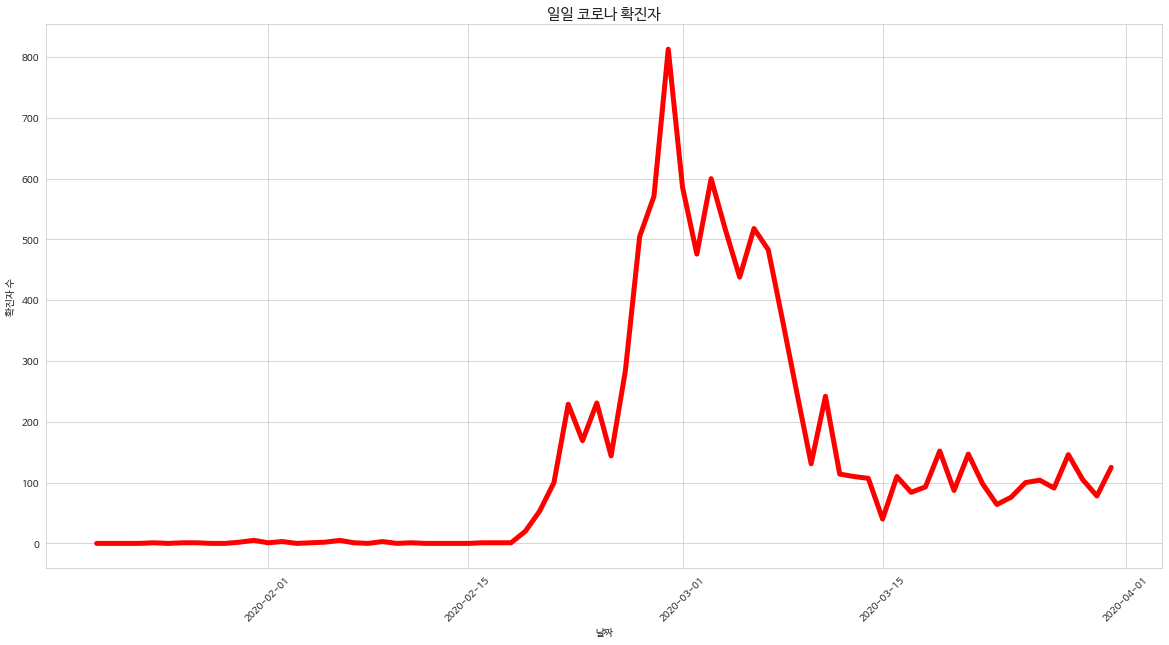

In [ ]:
plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='per_day_confirmed', data=corona_data, linewidth=5, color='red')
plt.title("일일 코로나 확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("확진자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 신천지 시기가 피크

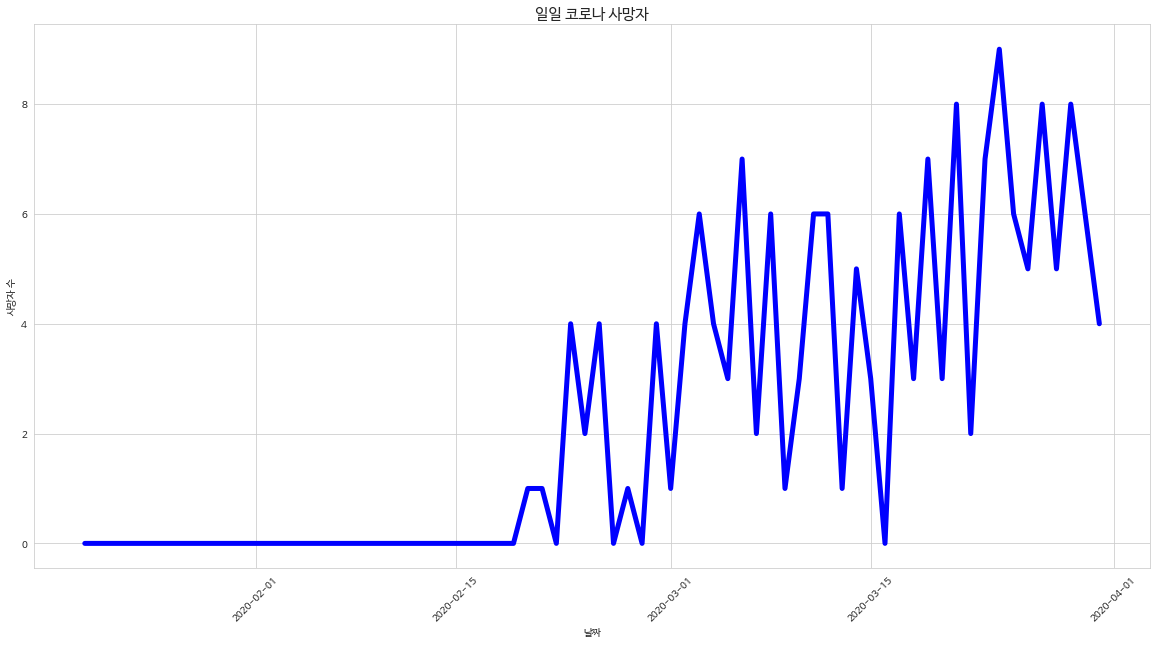

In [ ]:
plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='per_day_deceased', data=corona_data, linewidth=5, color='blue')
plt.title("일일 코로나 사망자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("사망자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

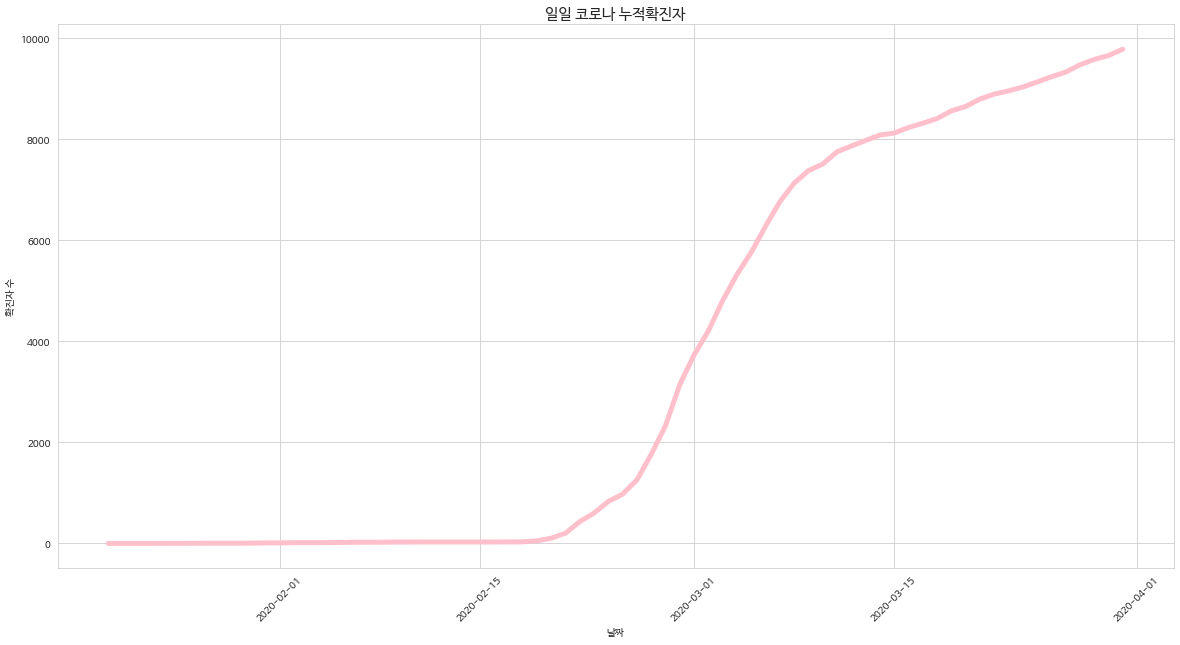

In [ ]:
# 누적으로 볼까?
plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='confirmed', data=corona_data, linewidth=5, color='pink')
plt.title("일일 코로나 누적확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("확진자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()
